# Multivariate Linear Regression

[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  2.]
 [ 1.  3.  3.]
 [ 1.  4.  4.]
 [ 1.  5.  5.]
 [ 1.  6.  6.]
 [ 1.  7.  7.]
 [ 1.  8.  8.]
 [ 1.  9.  9.]
 [ 1. 10. 10.]
 [ 1. 11. 11.]
 [ 1. 12. 12.]
 [ 1. 13. 13.]
 [ 1. 14. 14.]
 [ 1. 15. 15.]
 [ 1. 16. 16.]
 [ 1. 17. 17.]
 [ 1. 18. 18.]
 [ 1. 19. 19.]]
[[ 0.10828733]
 [ 3.58755695]
 [ 6.43150282]
 [ 8.05614664]
 [12.04729218]
 [14.35071251]
 [17.56720271]
 [20.52874785]
 [24.39794245]
 [26.33113518]
 [29.84555153]
 [33.4825789 ]
 [36.05600095]
 [39.72454989]
 [42.52702891]
 [44.28010339]
 [47.27633389]
 [51.75989116]
 [53.49470041]
 [56.13003003]]


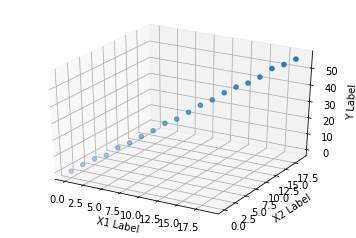

In [20]:
import numpy as np
def generate_linear_multivarite_data(a, N):
    """generate multivariate data
    :param np.array a are the parameters (including bias)"""
    dim = len(a)
    x = np.tile(np.arange(0,N), (dim-1, 1)).T
    x = np.hstack((np.ones((N, 1)), x))
    # linear data with uniform error
    y = x.dot(a.reshape((dim, 1))) + (2 * np.random.random((N, 1)) -1)
    return x, y

x, y = generate_linear_multivarite_data(np.array([0, 1, 2]), 20)
print(x)
print(y)

# plot data points in 3D space
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(x[:, 1], x[:, 2], y)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
    
plt.show()


In [12]:
# our hypothesis
def hypothesis(a):
    """In this case, our hypothesis is a hyperplane
    :param a should be a column vector of weights + bias"""
    return lambda x: x.dot(a)

def cost(a, x, y):
    # Squared error function 
    # Mean squared error
    N = len(x)
    h = hypothesis(a)
    # half, because good for gradient descent (derivative cancel out)
    return 1/(2*N) * np.sum(np.square(h(x)-y))

def cost_derivative_a(a, x, y):
    N = len(x)
    h = hypothesis(a)
    return 1/N * x.T.dot((h(x)-y))

In [13]:
# find parameters that minimize the cost function: Gradient Descent

def gradient_descent(x, y, alpha=0.005, num_steps=1000):
    """Given data, return the weights of the best fit"""
    a = np.random.normal(size=(x.shape[1], 1))
    for i in range(num_steps):
        c = cost(a, x, y)
        new_a = a - alpha * cost_derivative_a(a, x, y)
        if i%1000==0: print("Iteration: ", i, "cost: ", c)
        a = new_a
    return a

In [14]:
a = gradient_descent(x,y, alpha=0.005, num_steps=10000)
print(a)



Iteration:  0 cost:  1479.4051598502863
Iteration:  1000 cost:  0.11653301524775353
Iteration:  2000 cost:  0.11636968685967486
Iteration:  3000 cost:  0.11635855732227236
Iteration:  4000 cost:  0.11635779893235412
Iteration:  5000 cost:  0.11635774725408175
Iteration:  6000 cost:  0.11635774373261637
Iteration:  7000 cost:  0.11635774349265615
Iteration:  8000 cost:  0.11635774347630479
Iteration:  9000 cost:  0.11635774347519082
[[0.03866909]
 [1.72864197]
 [1.25320853]]


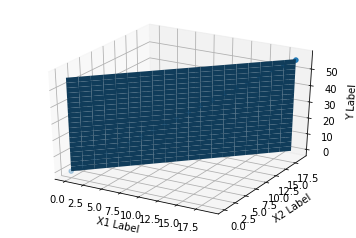

In [23]:
x_arr = x
y_arr = hypothesis(a)(x_arr)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(x[:, 1], x[:, 2], y)
ax.plot_surface(x_arr[:, 1], x_arr[:, 2], y_arr)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
    
plt.show()

## Using normal equations

![](./images/linear-regression-normal-equation.png)

In [33]:
# Gives problem because x is not invertible
weights = np.invert(np.matmul(x.T, x)).dot(x.T).dot(y)



TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

```
Gradient Descent            Normal Equation
Need to choose alpha        No need to choose alpha
Needs many iterations       No need to iterate
O (kn2kn^2kn2)              O(n3n^3n3), need to calculate inverse of XTXX^TXXTX
Works well when n is large  Slow if n is very large
```
